In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix  , classification_report , accuracy_score

# 1- loading dataset

In [129]:
df = pd.read_csv(r"C:\Users\saher\Desktop\workshop\Disease_analysis_prediction\Data\diabetes_dataset00.csv")

#### 1.1 explore data and under standing

In [130]:
df.shape

(70000, 34)

In [131]:
df.head()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,89,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,41,No,No,Positive,1,Normal,24,Protein Present,1770,No


In [132]:
df.tail(1)

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
69999,LADA,Positive,Positive,Yes,Absent,27,41,28,Moderate,Healthy,...,84,No,Yes,Negative,2,Abnormal,64,Ketones Present,3593,Yes


In [133]:
df["Target"].value_counts()

Target
MODY                                          5553
Secondary Diabetes                            5479
Cystic Fibrosis-Related Diabetes (CFRD)       5464
Type 1 Diabetes                               5446
Neonatal Diabetes Mellitus (NDM)              5408
Wolcott-Rallison Syndrome                     5400
Type 2 Diabetes                               5397
Prediabetic                                   5376
Gestational Diabetes                          5344
Type 3c Diabetes (Pancreatogenic Diabetes)    5320
Wolfram Syndrome                              5315
Steroid-Induced Diabetes                      5275
LADA                                          5223
Name: count, dtype: int64

In [134]:
df.columns

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test',
       'Birth Weight', 'Early Onset Symptoms'],
      dtype='object')

In [135]:
for column in df.columns :
    print(f"unique values in {column} : {df[column].unique()} \n")

unique values in Target : ['Steroid-Induced Diabetes' 'Neonatal Diabetes Mellitus (NDM)'
 'Prediabetic' 'Type 1 Diabetes' 'Wolfram Syndrome' 'LADA'
 'Type 2 Diabetes' 'Wolcott-Rallison Syndrome' 'Secondary Diabetes'
 'Type 3c Diabetes (Pancreatogenic Diabetes)' 'Gestational Diabetes'
 'Cystic Fibrosis-Related Diabetes (CFRD)' 'MODY'] 

unique values in Genetic Markers : ['Positive' 'Negative'] 

unique values in Autoantibodies : ['Negative' 'Positive'] 

unique values in Family History : ['No' 'Yes'] 

unique values in Environmental Factors : ['Present' 'Absent'] 

unique values in Insulin Levels : [40 13 27  8 17 29 10 47 21 16 22  9 38 14 12 30 19 42 34 11 24 44 20 15
 18  6 28 48  5 46 26 45 33 23 41 39  7 31 35 25 32 36 43 49 37] 

unique values in Age : [44  1 36  7 10 41 30  3 47 72 67 29 59  0 45 53 60 16 35 14 64  9 65 34
 51 11 56 37 22 70 33 50 62 40 28 12 38 19 39 46 43 77 73 32  5 49 26 52
 21 54 18 42 31 23 58 13  8 48 55 17 24 25 79  6  2  4 69 27 15 61 20 66
 68 78 57 71

In [136]:
type(df['Target']) # mean the type of data structure

pandas.core.series.Series

In [137]:
print(df['Target'].dtype) # mean the type of the storied data

object


In [138]:
df.describe()

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,21.607443,32.020700,24.782943,111.339543,194.867200,35.051657,160.701657,15.496414,47.564243,70.264671,1.804157,46.420529,3097.061071
std,10.785852,21.043173,6.014236,19.945000,44.532466,6.803461,48.165547,9.633096,19.984683,11.965600,0.680154,19.391089,713.837300
min,5.000000,0.000000,12.000000,60.000000,100.000000,20.000000,80.000000,0.000000,10.000000,30.000000,1.000000,10.000000,1500.000000
25%,13.000000,14.000000,20.000000,99.000000,163.000000,30.000000,121.000000,7.000000,32.000000,63.000000,1.000000,31.000000,2629.000000
50%,19.000000,31.000000,25.000000,113.000000,191.000000,34.000000,152.000000,16.000000,46.000000,72.000000,2.000000,48.000000,3103.000000
75%,28.000000,49.000000,29.000000,125.000000,225.000000,39.000000,194.000000,22.000000,64.000000,79.000000,2.000000,61.000000,3656.250000
max,49.000000,79.000000,39.000000,149.000000,299.000000,54.000000,299.000000,39.000000,99.000000,89.000000,3.000000,99.000000,4499.000000


In [139]:
df.isna().sum(). sum()

0

### now convert the target to numerical by label encoding

In [140]:
# Convert multi-class target to numerical labels
label_encoder = LabelEncoder()
df_target_encoded = df
df_target_encoded['Target'] = label_encoder.fit_transform(df['Target']) #use label encoded in this case for target because model return one output but you can use one hot if you use NN
df_target_encoded.head(2)

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,7,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,4,Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes


In [141]:
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Mapping:", mapping)

Mapping: {'Cystic Fibrosis-Related Diabetes (CFRD)': 0, 'Gestational Diabetes': 1, 'LADA': 2, 'MODY': 3, 'Neonatal Diabetes Mellitus (NDM)': 4, 'Prediabetic': 5, 'Secondary Diabetes': 6, 'Steroid-Induced Diabetes': 7, 'Type 1 Diabetes': 8, 'Type 2 Diabetes': 9, 'Type 3c Diabetes (Pancreatogenic Diabetes)': 10, 'Wolcott-Rallison Syndrome': 11, 'Wolfram Syndrome': 12}


### 1.2 visualization for understanding the relations

### Univariate analysis

In [142]:
df['Age'].describe()

count    70000.000000
mean        32.020700
std         21.043173
min          0.000000
25%         14.000000
50%         31.000000
75%         49.000000
max         79.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='count'>

<Axes: xlabel='Age', ylabel='count'>

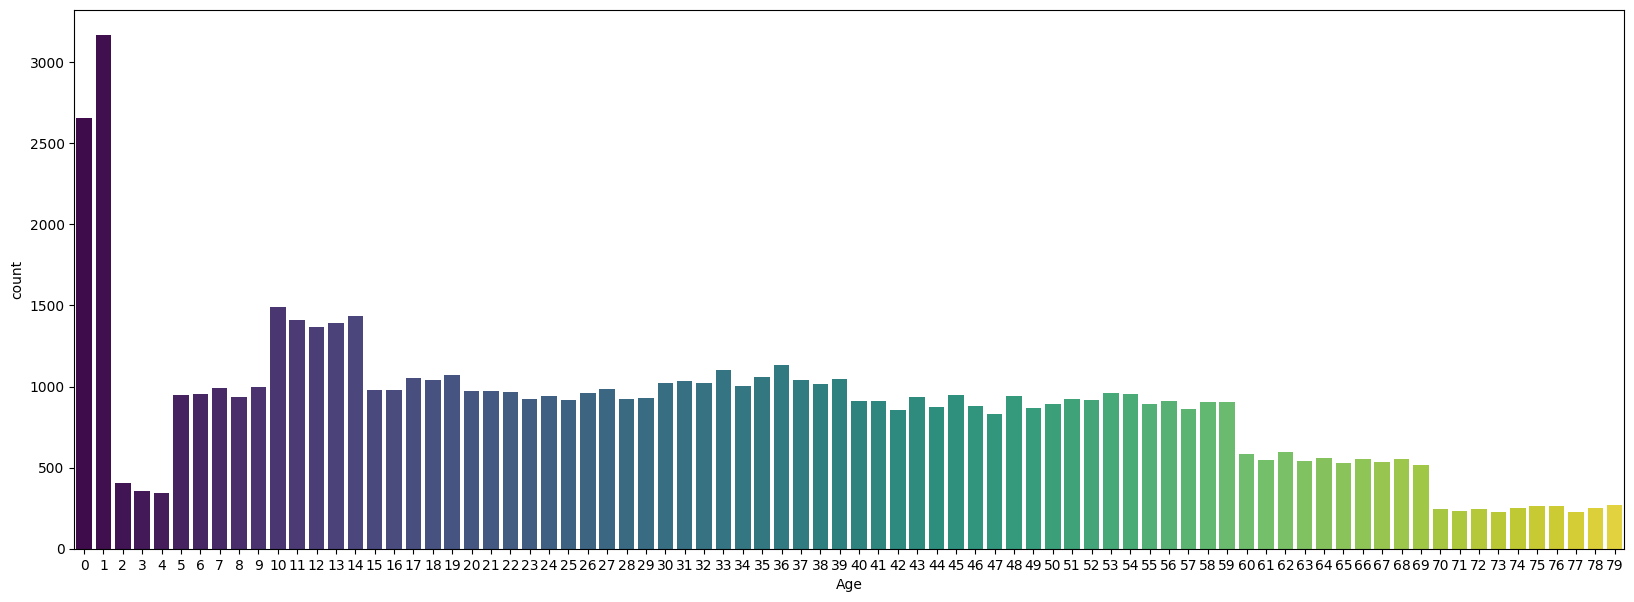

In [143]:
plt.figure(figsize=(20, 7))
sns.countplot(data=df, x='Age', palette='viridis',legend=False,hue='Age') 

##### The age distribution is left skewed (more fromm 0-30)

In [144]:
# BMI (Body Mass Index) column
df['BMI'].describe()

count    70000.000000
mean        24.782943
std          6.014236
min         12.000000
25%         20.000000
50%         25.000000
75%         29.000000
max         39.000000
Name: BMI, dtype: float64

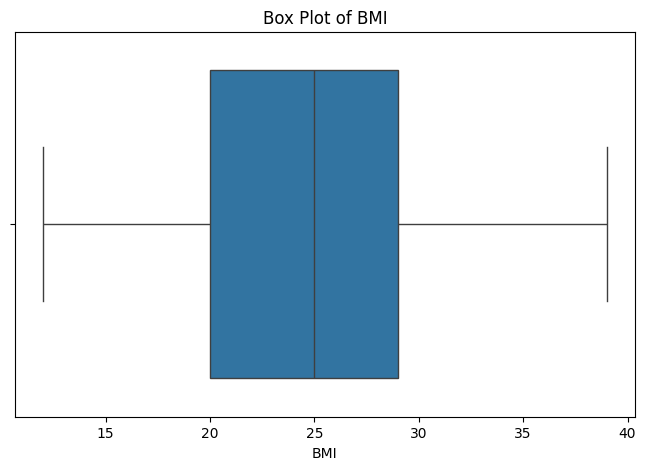

In [145]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['BMI'])
plt.title('Box Plot of BMI')
plt.xlabel('BMI')
plt.show()

<Axes: xlabel='BMI', ylabel='count'>

<Axes: xlabel='BMI', ylabel='count'>

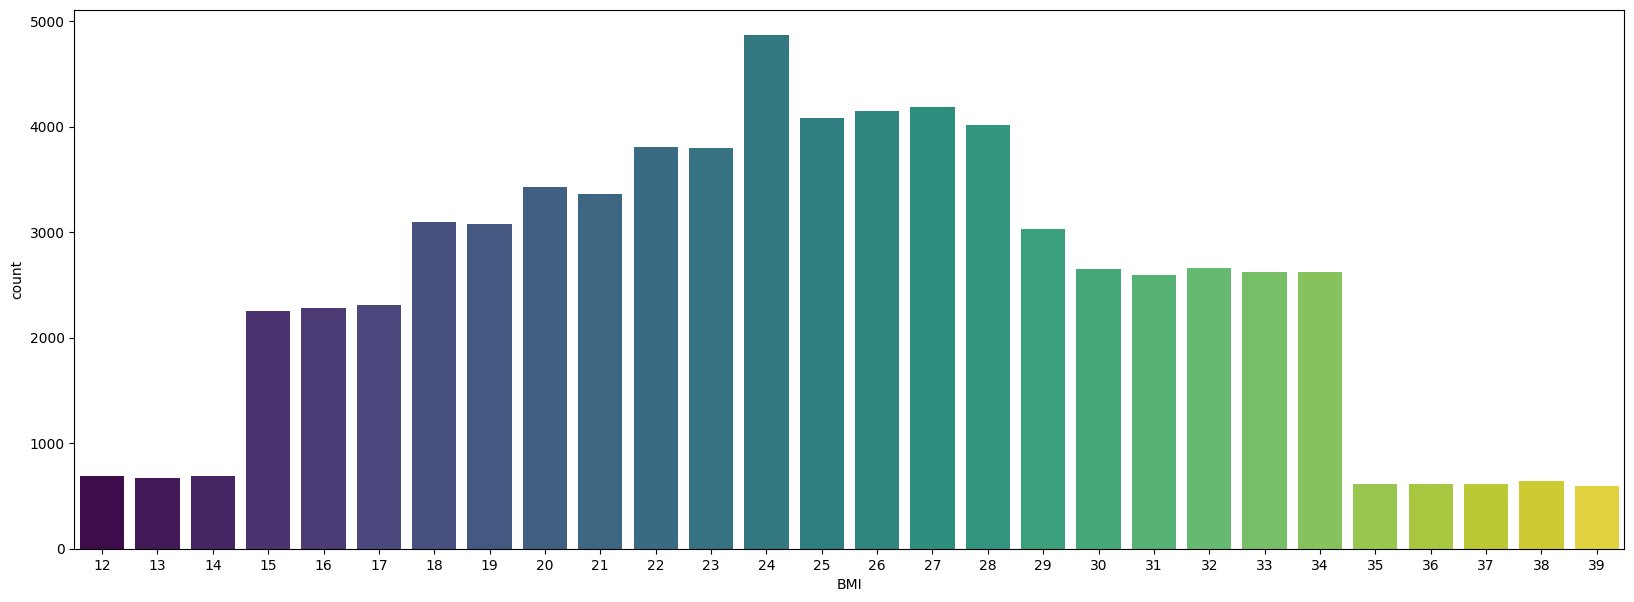

In [146]:
plt.figure(figsize=(20, 7))
sns.countplot(data=df, x='BMI', palette='viridis',legend=False,hue='BMI') 

In [147]:
# Blood Glucose level column
df['Blood Glucose Levels'].describe()

count    70000.000000
mean       160.701657
std         48.165547
min         80.000000
25%        121.000000
50%        152.000000
75%        194.000000
max        299.000000
Name: Blood Glucose Levels, dtype: float64

<Axes: xlabel='Blood Glucose Levels', ylabel='Count'>

<Axes: xlabel='Blood Glucose Levels', ylabel='Count'>

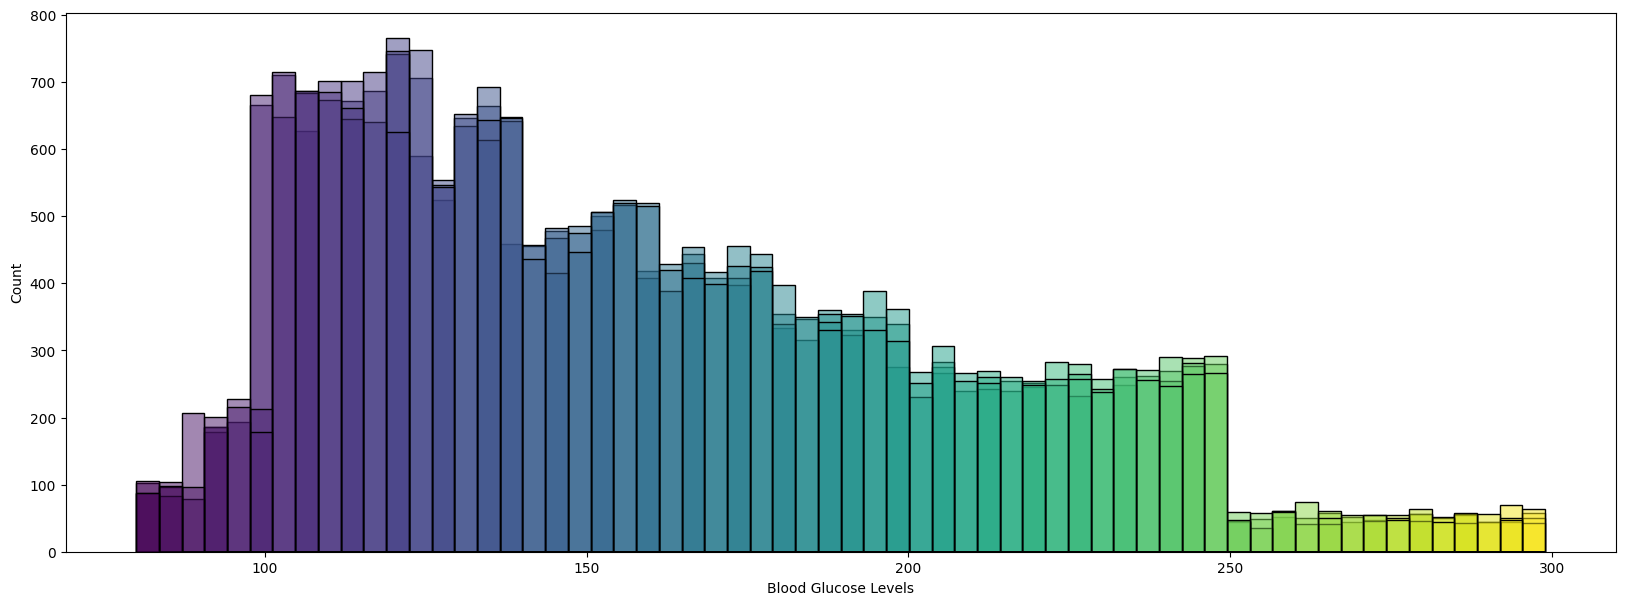

In [148]:
plt.figure(figsize=(20, 7))
sns.histplot(data=df, x='Blood Glucose Levels', palette='viridis', legend=False, hue='Blood Glucose Levels')

##### The Glocose level hist plot is left skewed meaning that the people with low glucose levels are the highest 

In [149]:
#Pregnancy history column
df['Pregnancy History'].describe()

count      70000
unique         2
top       Normal
freq       35270
Name: Pregnancy History, dtype: object

<Axes: ylabel='count'>

<Axes: ylabel='count'>

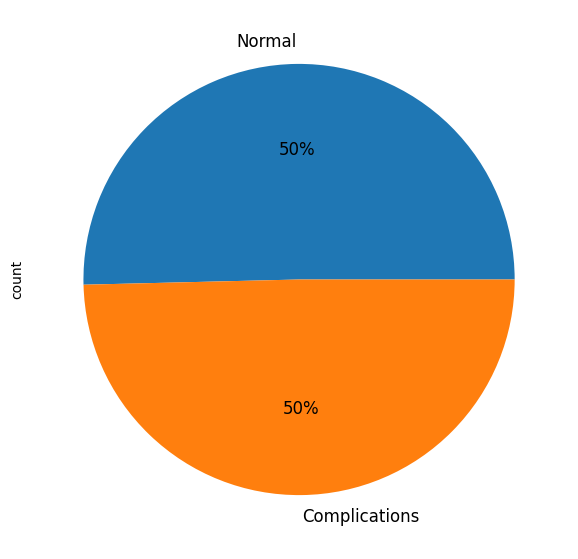

In [150]:
plt.figure(figsize=(15, 7))
counts = df['Pregnancy History'].value_counts()
counts.plot(kind = 'pie', fontsize = 12, autopct = '%1.0f%%')

In [151]:
# Alcohol consumption column
df['Alcohol Consumption'].describe()

count     70000
unique        3
top         Low
freq      23411
Name: Alcohol Consumption, dtype: object

<Axes: ylabel='count'>

<Axes: ylabel='count'>

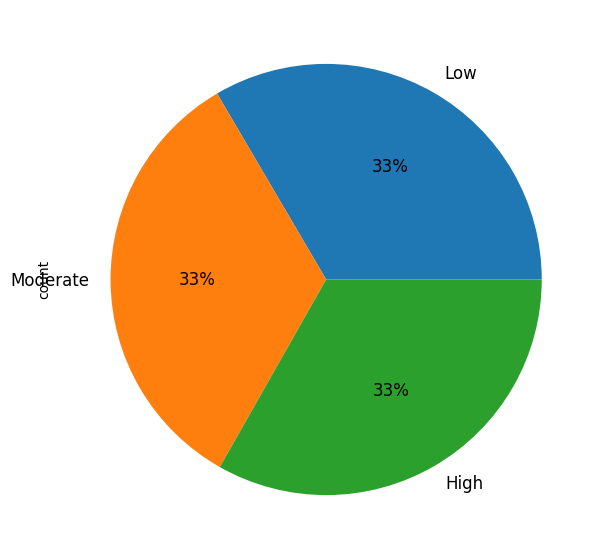

In [152]:
plt.figure(figsize=(15, 7))
counts = df['Alcohol Consumption'].value_counts()
counts.plot(kind = 'pie', fontsize = 12, autopct = '%1.0f%%')

In [153]:
#Blood Pressure column
df['Blood Pressure'].describe()

count    70000.000000
mean       111.339543
std         19.945000
min         60.000000
25%         99.000000
50%        113.000000
75%        125.000000
max        149.000000
Name: Blood Pressure, dtype: float64

<Axes: xlabel='Blood Pressure', ylabel='Count'>

<Axes: xlabel='Blood Pressure', ylabel='Count'>

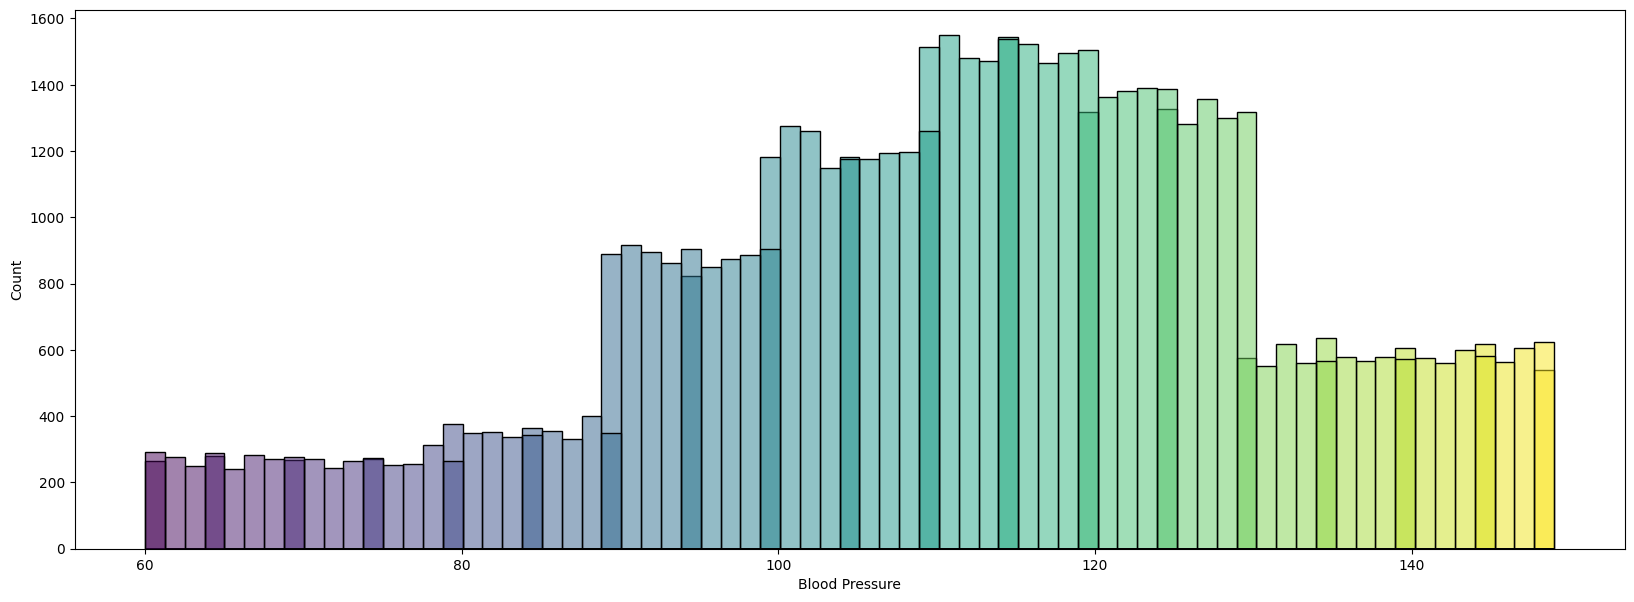

In [154]:
plt.figure(figsize=(20, 7))
sns.histplot(data=df, x='Blood Pressure', palette='viridis',legend=False,hue='Blood Pressure') 

##### The Blood Pressure is right skewed meaning that the people with high blood pressure are the highest

In [155]:
# Target column
df['Target'].describe()

count    70000.000000
mean         5.989729
std          3.737753
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: Target, dtype: float64

In [156]:
df['Target'].unique()

array([ 7,  4,  5,  8, 12,  2,  9, 11,  6, 10,  1,  0,  3])

<Axes: xlabel='Target', ylabel='count'>

<Axes: xlabel='Target', ylabel='count'>

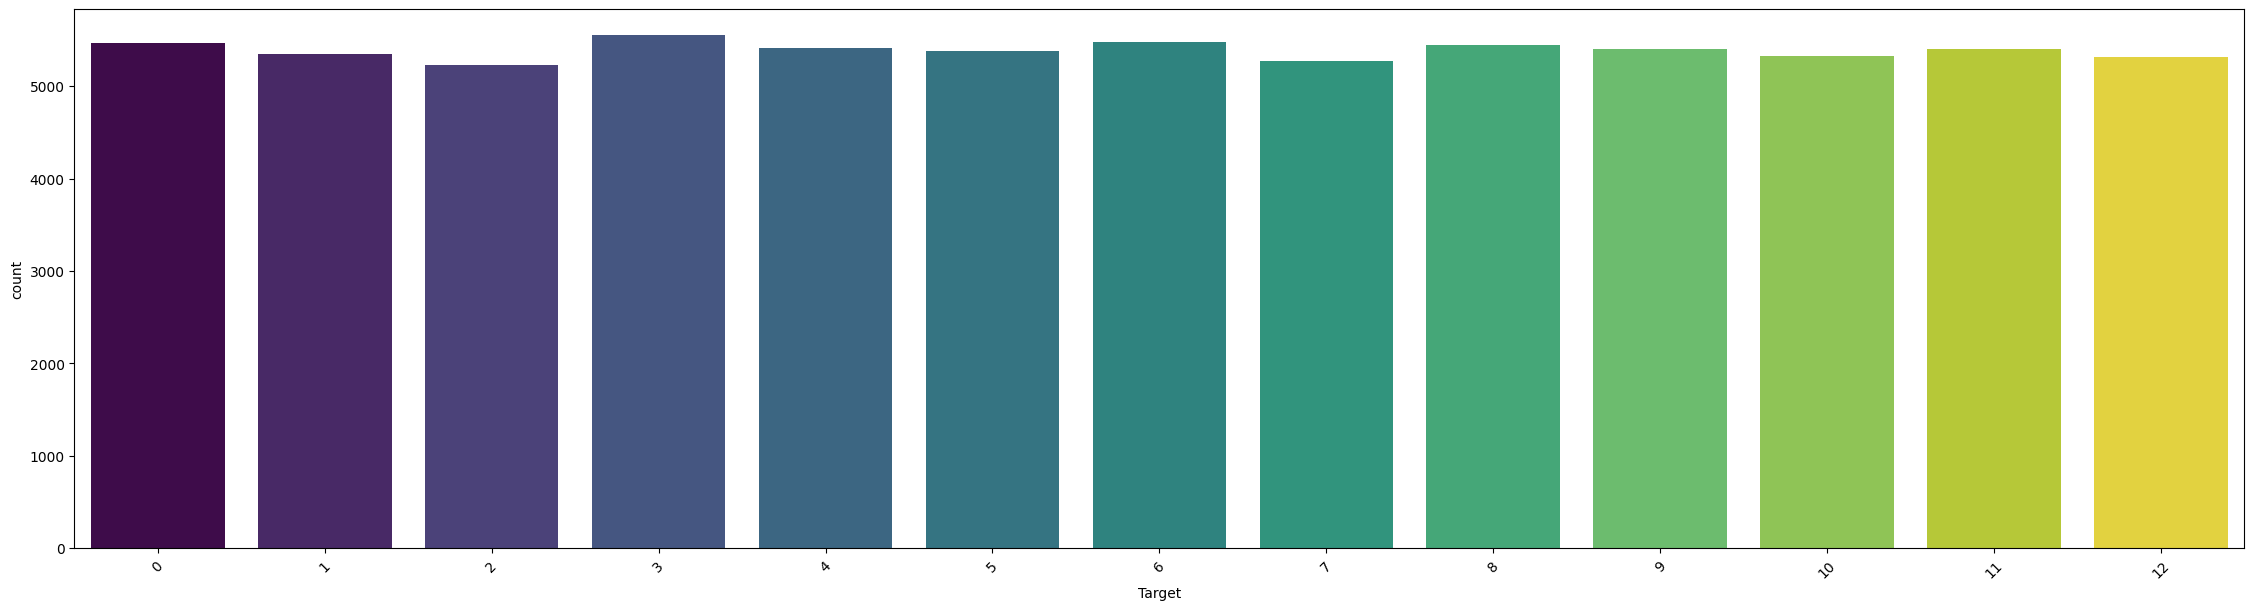

In [157]:
plt.figure(figsize=(28, 7))
plt.xticks(rotation=45)
sns.countplot(data=df, x='Target', palette='viridis',legend=False,hue='Target') 

## Multivariate analysis

In [158]:
int_col = df.select_dtypes(include='number')
int_col.shape

(70000, 14)

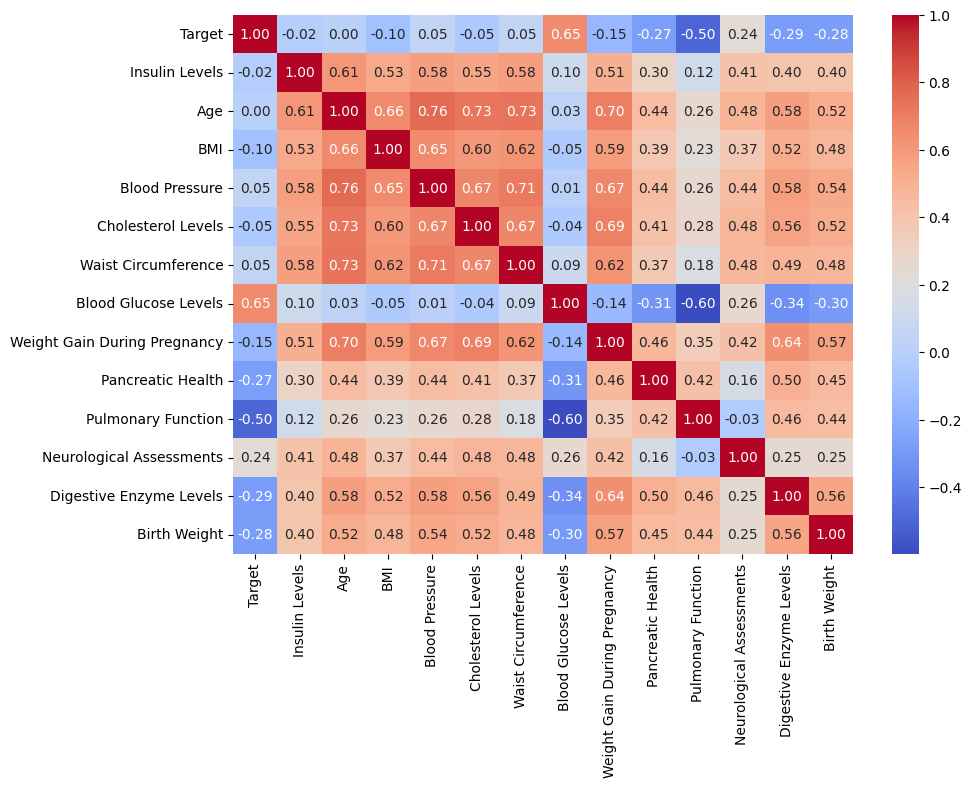

In [159]:
corr_matrix = int_col.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

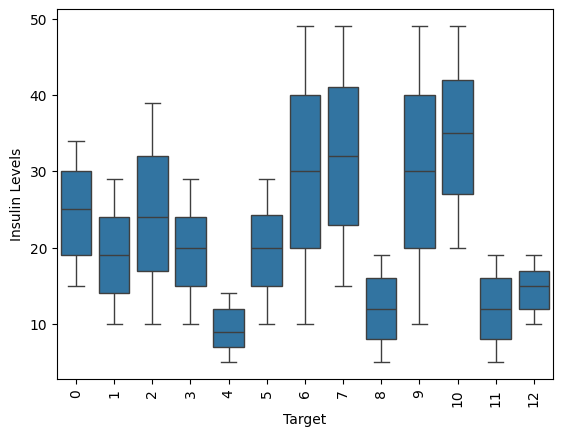

In [160]:
# insulin level vs target
sns.boxplot(x='Target', y='Insulin Levels', data=df)
plt.xticks(rotation=90)
plt.show()

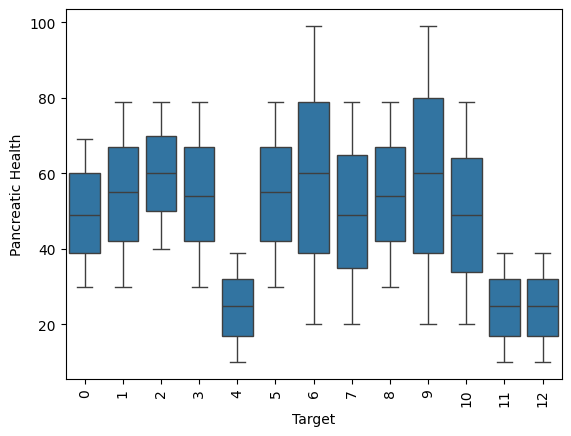

In [161]:
#pancreatic health vs target
sns.boxplot(x='Target', y='Pancreatic Health', data=df)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'diabetes type')

Text(0.5, 0, 'diabetes type')

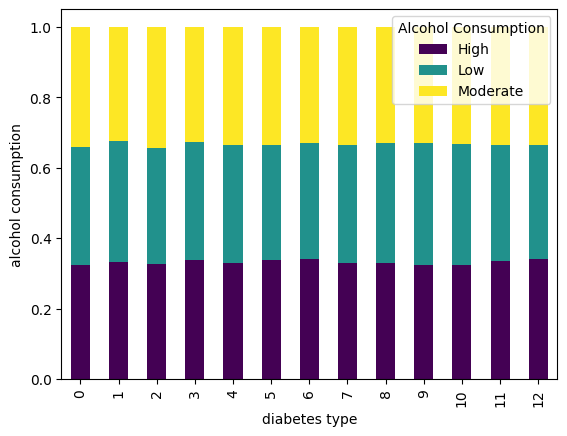

In [162]:
# Alcohol consumption vs target
ct = pd.crosstab(df['Target'], df['Alcohol Consumption'] , normalize='index')
ct.plot(kind='bar' , stacked=True , colormap='viridis')
plt.ylabel('alcohol consumption')
plt.xlabel('diabetes type')

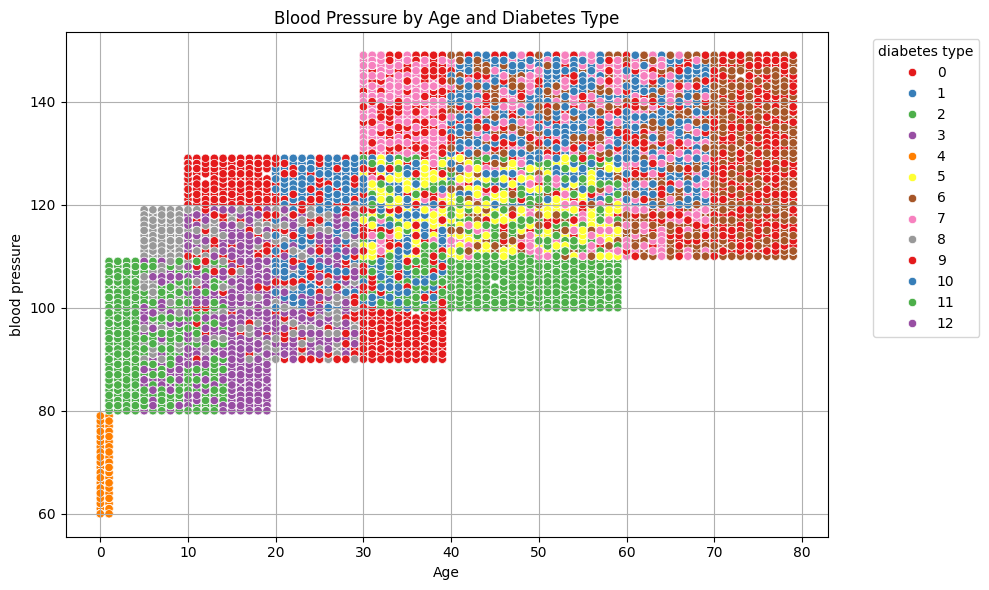

In [163]:
# Blood pressure vs Age by target
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Blood Pressure', hue='Target', data=df, palette='Set1')

plt.title('Blood Pressure by Age and Diabetes Type')
plt.grid(True)
plt.xlabel('Age')
plt.ylabel('blood pressure')

plt.legend(title='diabetes type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

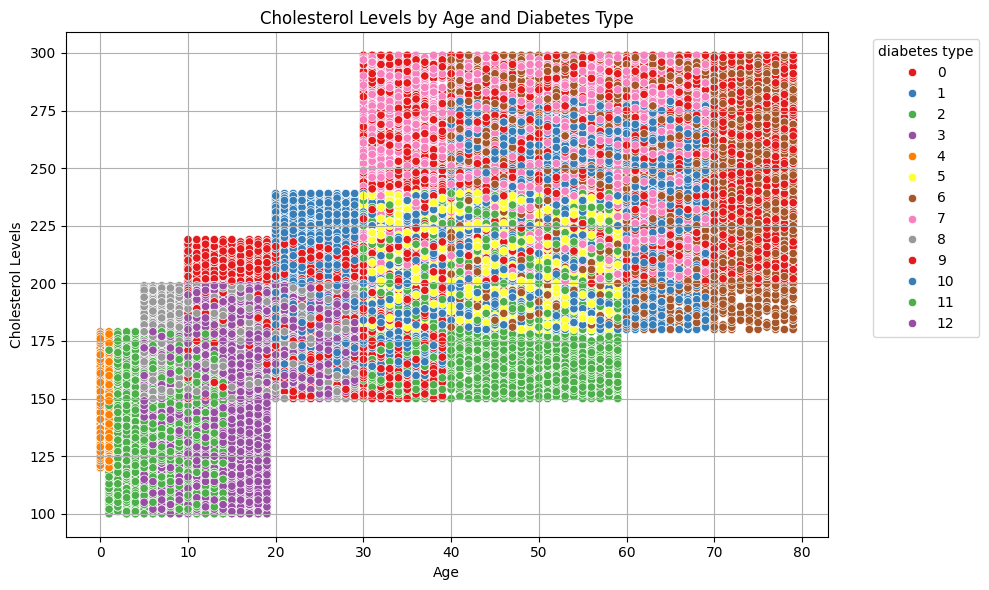

In [164]:
# colesterol levels vs Age by target
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Cholesterol Levels', hue='Target', data=df, palette='Set1')

plt.title('Cholesterol Levels by Age and Diabetes Type')
plt.grid(True)
plt.xlabel('Age')
plt.ylabel('Cholesterol Levels')

plt.legend(title='diabetes type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

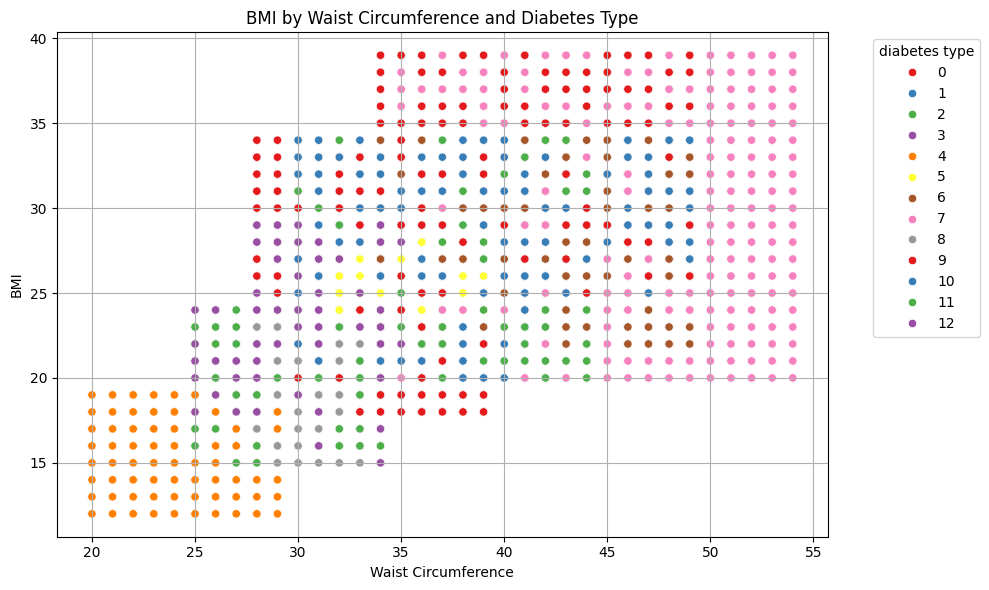

In [165]:
# BMI vs Age Waist circumference by target
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Waist Circumference', y='BMI', hue='Target', data=df, palette='Set1')

plt.title('BMI by Waist Circumference and Diabetes Type')
plt.grid(True)
plt.xlabel('Waist Circumference')
plt.ylabel('BMI')

plt.legend(title='diabetes type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## feature extraction

In [166]:
columns = [column for column in df.columns if df[column].dtype == 'object' and column != "Target" ]
print(columns)

['Genetic Markers', 'Autoantibodies', 'Family History', 'Environmental Factors', 'Physical Activity', 'Dietary Habits', 'Ethnicity', 'Socioeconomic Factors', 'Smoking Status', 'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS', 'Previous Gestational Diabetes', 'Pregnancy History', 'Cystic Fibrosis Diagnosis', 'Steroid Use History', 'Genetic Testing', 'Liver Function Tests', 'Urine Test', 'Early Onset Symptoms']


In [167]:
df_encoded = pd.get_dummies(df_target_encoded , columns =columns)
df_encoded.shape

(70000, 59)

In [168]:
df_encoded.columns

Index(['Target', 'Insulin Levels', 'Age', 'BMI', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Neurological Assessments',
       'Digestive Enzyme Levels', 'Birth Weight', 'Genetic Markers_Negative',
       'Genetic Markers_Positive', 'Autoantibodies_Negative',
       'Autoantibodies_Positive', 'Family History_No', 'Family History_Yes',
       'Environmental Factors_Absent', 'Environmental Factors_Present',
       'Physical Activity_High', 'Physical Activity_Low',
       'Physical Activity_Moderate', 'Dietary Habits_Healthy',
       'Dietary Habits_Unhealthy', 'Ethnicity_High Risk', 'Ethnicity_Low Risk',
       'Socioeconomic Factors_High', 'Socioeconomic Factors_Low',
       'Socioeconomic Factors_Medium', 'Smoking Status_Non-Smoker',
       'Smoking Status_Smoker', 'Alcohol Consumption_High',
       'Alcohol Consumption_Low', 'Alcohol Consumption_M

In [169]:
correlation_matrix1 = df_encoded[df_encoded.columns[:20]].corr()

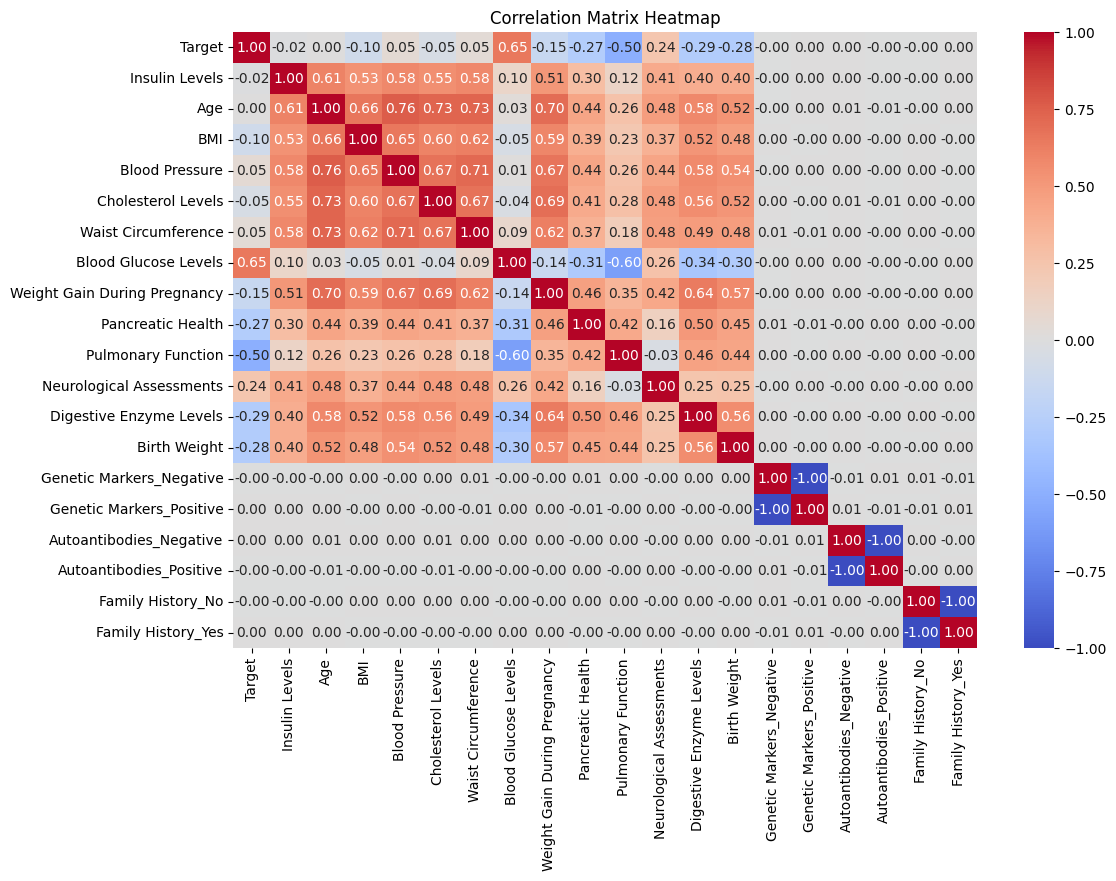

In [170]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [171]:
selected_columns = [df_encoded.columns[0]] + list(df_encoded.columns[20:40])

correlation_matrix2 = df_encoded[selected_columns].corr()

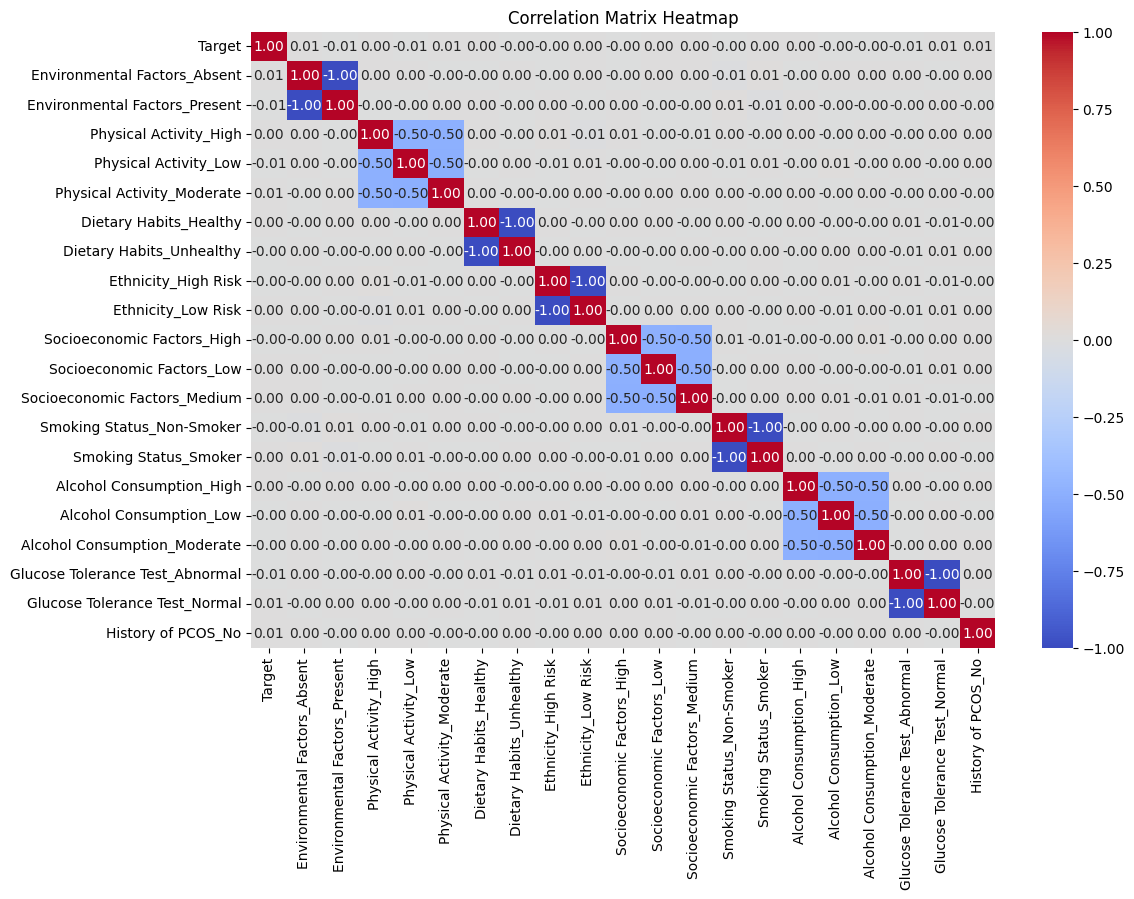

In [172]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [173]:
selected_columns3 = [df_encoded.columns[0]] + list(df_encoded.columns[20:40])
correlation_matrix3 = df_encoded[selected_columns3].corr()

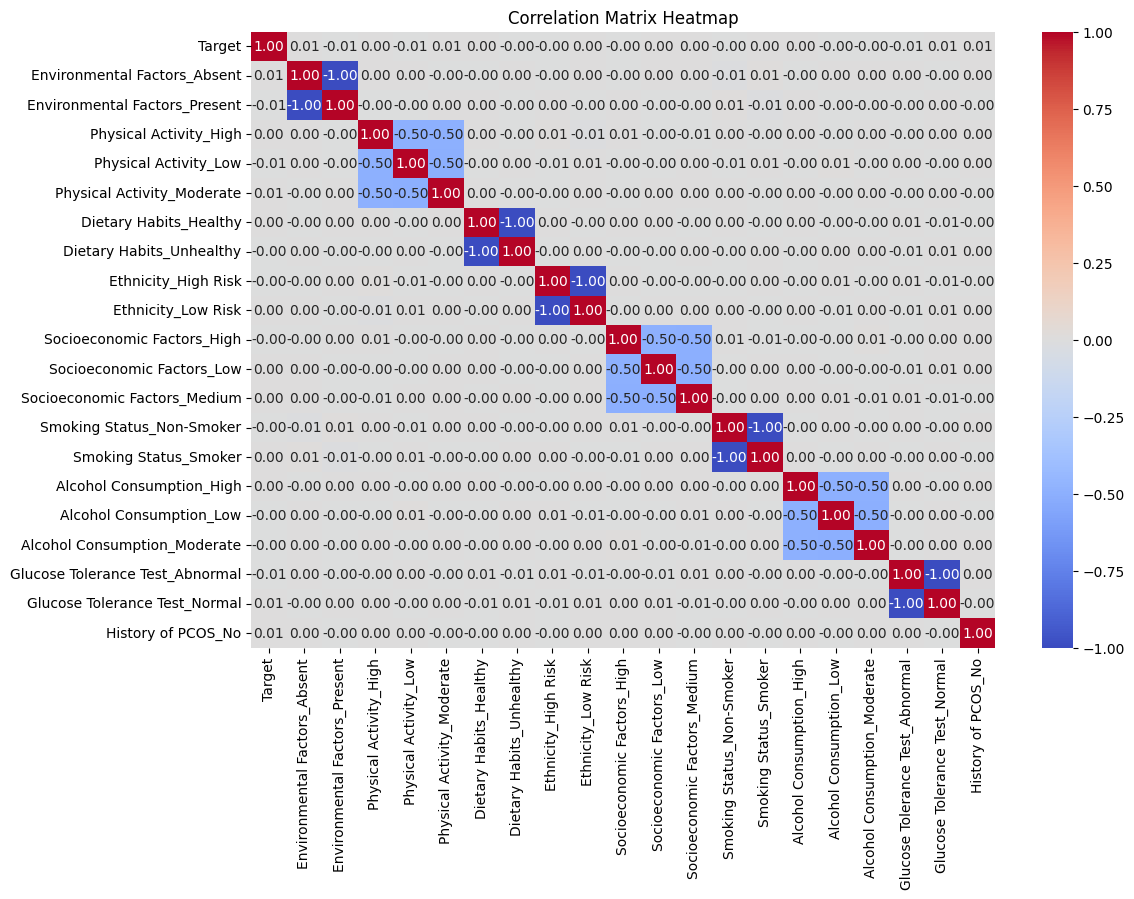

In [174]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

## --------------------------- (info) --------------------------
this is a good info is the features will be 13 only from correlation i can know what has effect on target now i can do my train

------------------------------------------------------

# feature selection

In [175]:
df_final = df_encoded[df_encoded.columns[:13]]

In [176]:
final_correlation = df_final.corr()

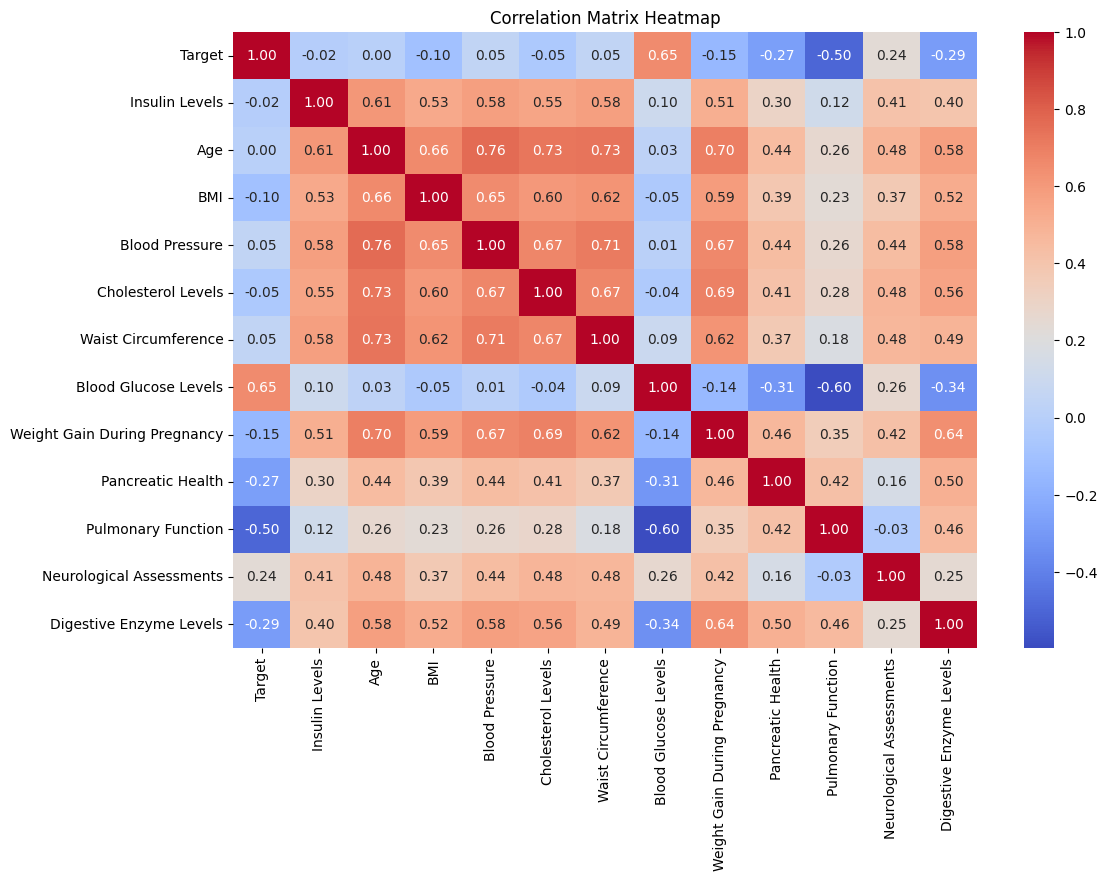

In [177]:
plt.figure(figsize=(12, 8))
sns.heatmap(final_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# for good model you should do scaling in all features convert the categorical data to numirical by one hot encoding

# after scaling ready to modeling

In [178]:
x = df_final.drop(columns = ['Target'])
y = df_final['Target']

scaler  = StandardScaler()
x_scaled = scaler.fit_transform(x)
type(x_scaled)

numpy.ndarray

In [179]:
x_scaled = pd.DataFrame(x_scaled ,  columns = x.columns)
x_scaled.head(2)

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels
0,1.705261,0.569277,2.197644,0.634773,0.137716,2.197183,0.151527,0.259896,-0.578659,0.479322,1.758207,0.494018
1,-0.798037,-1.474156,-1.294096,-1.922277,-1.658739,-1.624429,0.359146,-0.778199,-1.079046,-0.857855,-1.182325,-0.949955


In [180]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components = 10)


# x_pca = pca.fit_transform(x_scaled)

In [181]:
# x_pca.head(2)

In [182]:
x_train , x_test ,  y_train , y_test = train_test_split(x_scaled , y , test_size =0.2 ,  random_state=42)

print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (56000, 12)
X_test shape: (14000, 12)
y_train shape: (56000,)
y_test shape: (14000,)


In [183]:
# Train RandomForestClassifier and save the model
model_forest = RandomForestClassifier(random_state=42, class_weight='balanced')
model_forest.fit(x_train, y_train)

# Save the model
with open(r"C:\Users\saher\Desktop\workshop\Disease_analysis_prediction\Deployment\Models\random_forest_model.pkl", "wb") as file:
    pickle.dump(model_forest, file)

print("RandomForestClassifier model saved successfully.")

RandomForestClassifier model saved successfully.


In [184]:
scores = cross_val_score(model_forest, x_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 0.8963571428571429


In [185]:
y_pred = model_forest.predict(x_test)
y_pred[:10] , list(y_test[:10])

(array([6, 6, 7, 9, 1, 6, 1, 9, 5, 2]), [6, 9, 7, 9, 1, 6, 1, 9, 5, 2])

In [186]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8945


In [187]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95      1070
           1       0.89      0.94      0.91      1072
           2       0.97      0.93      0.95      1072
           3       0.95      0.85      0.90      1194
           4       1.00      1.00      1.00      1018
           5       0.97      1.00      0.98      1089
           6       0.78      0.77      0.78      1053
           7       0.81      0.81      0.81      1048
           8       0.85      0.99      0.92      1123
           9       0.91      0.70      0.79      1083
          10       0.80      1.00      0.89      1064
          11       0.85      0.90      0.88      1063
          12       0.89      0.84      0.87      1051

    accuracy                           0.89     14000
   macro avg       0.90      0.89      0.89     14000
weighted avg       0.90      0.89      0.89     14000



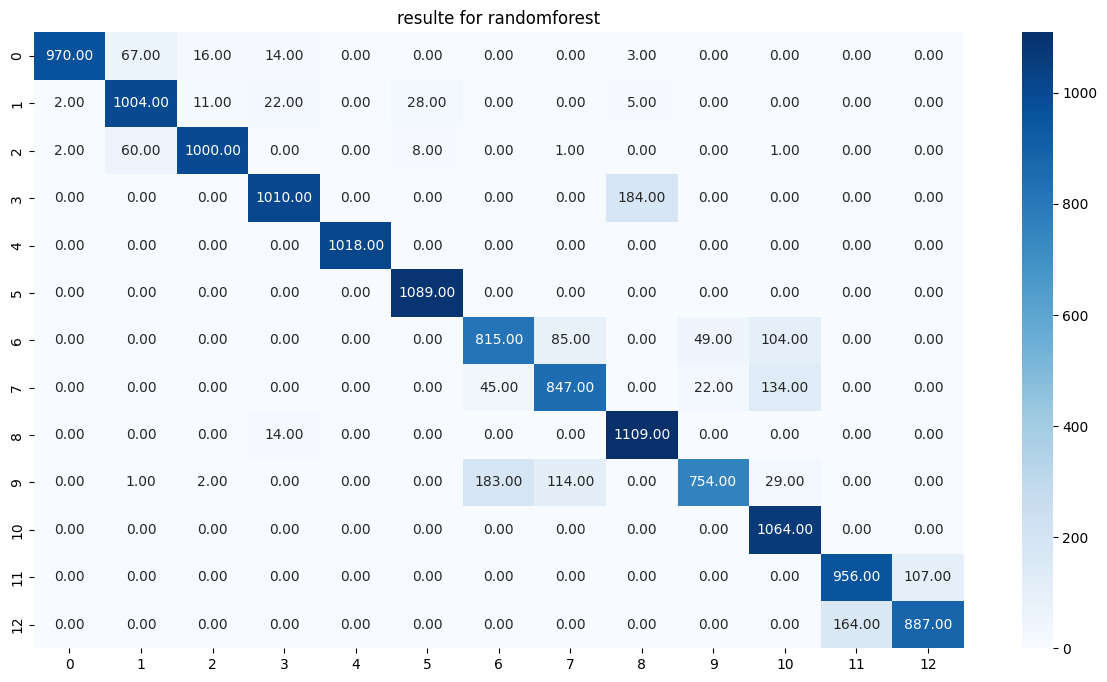

In [188]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=((15, 8)))
sns.heatmap(cm , annot = True , cmap="Blues" , fmt = ".2f")
plt.title('resulte for randomforest')
plt.show()


# GridSearchCV

In [189]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=2,
    n_jobs=-1  # Use all available cores
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV model saved successfully.


Test Accuracy: 0.8948571428571429
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1070
           1       0.89      0.94      0.91      1072
           2       0.98      0.93      0.95      1072
           3       0.97      0.84      0.90      1194
           4       1.00      1.00      1.00      1018
           5       0.97      1.00      0.98      1089
           6       0.79      0.78      0.79      1053
           7       0.79      0.85      0.82      1048
           8       0.85      1.00      0.92      1123
           9       0.95      0.67      0.78      1083
          10       0.80      1.00      0.89      1064
          11       0.85      0.89      0.87      1063
          12       0.88      0.84      0.86      1051

    accuracy                           0.89     14000
   macro avg       0.90      0.90      0.89     14000
weighted avg       0.90      0.89      0.89     14000



Test Accuracy: 0.8948571428571429
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1070
           1       0.89      0.94      0.91      1072
           2       0.98      0.93      0.95      1072
           3       0.97      0.84      0.90      1194
           4       1.00      1.00      1.00      1018
           5       0.97      1.00      0.98      1089
           6       0.79      0.78      0.79      1053
           7       0.79      0.85      0.82      1048
           8       0.85      1.00      0.92      1123
           9       0.95      0.67      0.78      1083
          10       0.80      1.00      0.89      1064
          11       0.85      0.89      0.87      1063
          12       0.88      0.84      0.86      1051

    accuracy                           0.89     14000
   macro avg       0.90      0.90      0.89     14000
weighted avg       0.90      0.89      0.89     14000



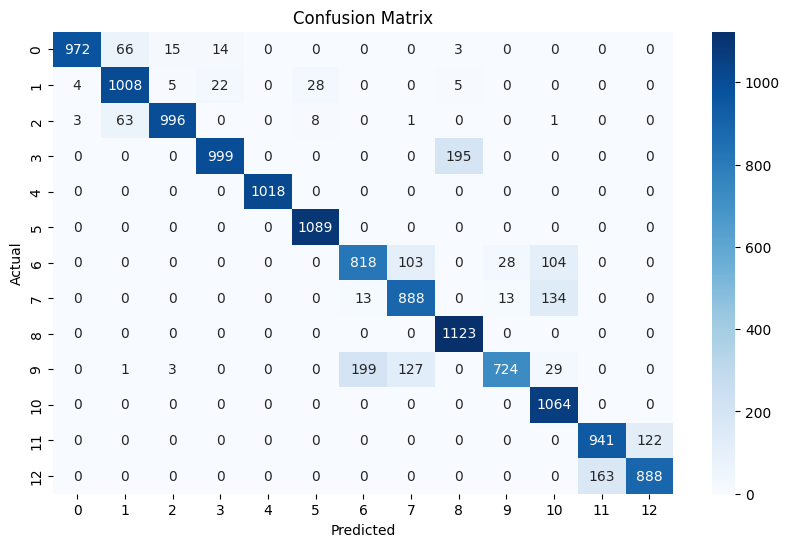

In [190]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM

In [191]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovr')  # 'ovr' is default for multi-class

# Train the model
svm_model.fit(x_train, y_train)

SVC()

In [192]:
# Predict on the test set
y_pred = svm_model.predict(x_test)

In [193]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.8260714285714286
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1070
           1       0.78      0.78      0.78      1072
           2       0.89      0.87      0.88      1072
           3       0.82      0.81      0.81      1194
           4       1.00      1.00      1.00      1018
           5       0.87      0.94      0.91      1089
           6       0.72      0.65      0.68      1053
           7       0.75      0.67      0.71      1048
           8       0.82      0.88      0.85      1123
           9       0.79      0.73      0.76      1083
          10       0.68      0.88      0.77      1064
          11       0.86      0.88      0.87      1063
          12       0.88      0.86      0.87      1051

    accuracy                           0.83     14000
   macro avg       0.83      0.83      0.83     14000
weighted avg       0.83      0.83      0.83     14000

Confusion Matrix:
[[ 858   

In [194]:
df_final.shape

(70000, 13)

In [195]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, ReLU, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard, CSVLogger
from tensorflow.keras.optimizers import Adam

# Input layer
input_dim = 12
inputs = Input(shape=(input_dim,))

# First hidden layer
x = Dense(units=128)(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)

# Second hidden layer
x = Dense(units=128)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

# Third hidden layer
x = Dense(units=264)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

# Fourth hidden layer
x = Dense(units=512)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

# Fifth hidden layer
x = Dense(units=128)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

# Sixth hidden layer
x = Dense(units=32)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

# Output layer
outputs = Dense(units=13, activation="softmax")(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Callbacks
model_checkpoint = ModelCheckpoint("best_model_no_dropout.h5", monitor="val_loss", save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3)
early_stop = EarlyStopping(monitor="val_loss", patience=7)
tensorboard = TensorBoard(log_dir="logs_no_dropout")
csv_logger = CSVLogger("training_log_no_dropout.csv")

callbacks = [model_checkpoint, reduce_lr, early_stop, tensorboard, csv_logger]

# Model summary
model.summary()

In [ ]:
x_test , x_val , y_test , y_val = train_test_split(x_test , y_test , test_size = 0.3 , random_state = 42)

In [ ]:
x_train.shape , y_train.shape , x_train.isna().sum().sum() , y_train.isna().sum()

((56000, 12), (56000,), 0, 0)

In [ ]:
print(y_val.unique())

[11  3  8  9  6  7  5  4 10  2  1  0 12]


In [ ]:
history = model.fit(
                x_train,
                y_train,
                validation_data = (x_val , y_val) ,
                callbacks=callbacks,
                epochs = 100 ,
                batch_size = 32 ,
                verbose = 1
)  # using relu is better 

Epoch 1/100
1750/1750 [==============================] - 18s 7ms/step - loss: 0.6328 - accuracy: 0.7413 - val_loss: 0.5459 - val_accuracy: 0.7707 - lr: 0.0010
Epoch 2/100
1750/1750 [==============================] - 24s 14ms/step - loss: 0.4935 - accuracy: 0.7971 - val_loss: 0.4769 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 3/100
1750/1750 [==============================] - 23s 13ms/step - loss: 0.4446 - accuracy: 0.8168 - val_loss: 0.4294 - val_accuracy: 0.8186 - lr: 0.0010
Epoch 4/100
1750/1750 [==============================] - 11s 6ms/step - loss: 0.4124 - accuracy: 0.8283 - val_loss: 0.4147 - val_accuracy: 0.8276 - lr: 0.0010
Epoch 5/100
1750/1750 [==============================] - 11s 6ms/step - loss: 0.3857 - accuracy: 0.8374 - val_loss: 0.4254 - val_accuracy: 0.8248 - lr: 0.0010
Epoch 6/100
1750/1750 [==============================] - 12s 7ms/step - loss: 0.3633 - accuracy: 0.8457 - val_loss: 0.3914 - val_accuracy: 0.8343 - lr: 0.0010
Epoch 7/100
1750/1750 [=====================

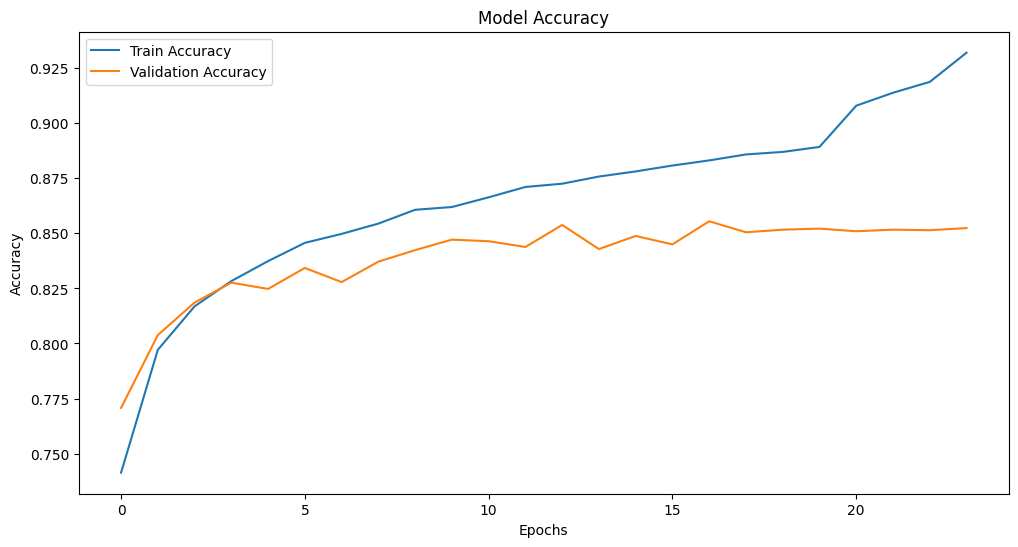

In [ ]:
plt.figure(figsize =(12,6))
plt.plot(history.history["accuracy"] , label = "Train Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

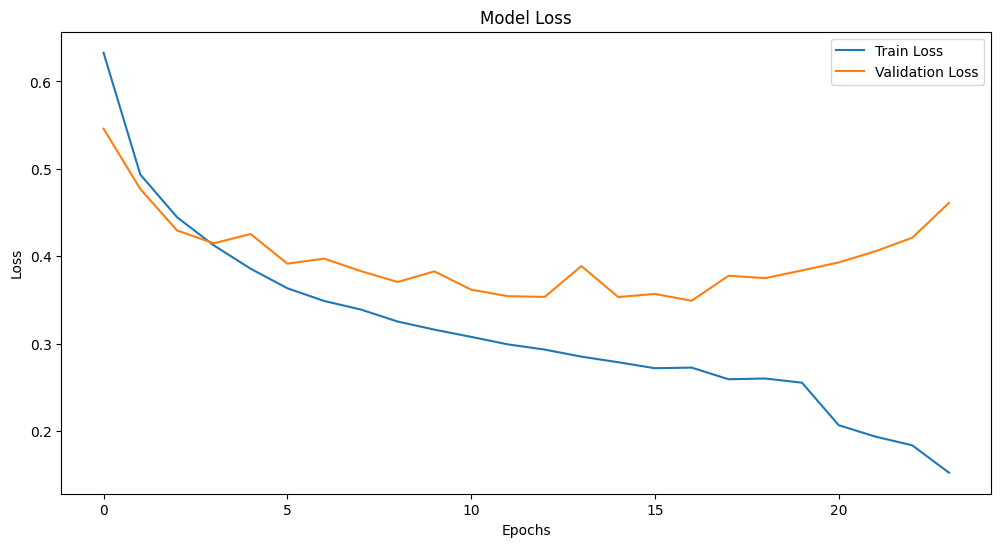

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# now i will add dropout to improve the model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, ReLU, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard, CSVLogger
from tensorflow.keras.optimizers import Adam

# Input layer
input_dim = 12
inputs = Input(shape=(input_dim,))

# First hidden layer
x = Dense(units=128)(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.2)(x)

# Second hidden layer
x = Dense(units=128)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.2)(x)

# Third hidden layer
x = Dense(units=264)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.3)(x)

# Fourth hidden layer
x = Dense(units=512)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.3)(x)

# Fifth hidden layer
x = Dense(units=128)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.2)(x)

# Sixth hidden layer
x = Dense(units=32)(x)
x = BatchNormalization()(x)
x = ReLU()(x)

# Output layer
outputs = Dense(units=13, activation="softmax")(x)

# Define the model
model_dropout = Model(inputs=inputs, outputs=outputs)

# Compile the model
model_dropout.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Callbacks
model_checkpoint = ModelCheckpoint("best_model_2.h5", monitor="val_loss", save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3)
early_stop = EarlyStopping(monitor="val_loss", patience=7)
tensorboard = TensorBoard(log_dir="logs2")
csv_logger = CSVLogger("training_log_2.csv")

callbacks = [model_checkpoint, reduce_lr, early_stop, tensorboard, csv_logger]

# Model summary
model_dropout.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_8 (Dense)             (None, 64)                832       
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 re_lu_7 (ReLU)              (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 264)               34056     
                                                                 
 re_lu_8 (ReLU)              (None, 264)               0         
                                                                 
 dropout (Dropout)           (None, 264)               0   

In [196]:
history2 = model_dropout.fit(
                x_train,
                y_train,
                validation_data = (x_val , y_val) ,
                callbacks=callbacks,
                epochs = 100,
                batch_size = 32 ,
                verbose = 1
)  # using relu is better 

Epoch 1/100
1750/1750 [==============================] - 16s 9ms/step - loss: 0.6542 - accuracy: 0.7363 - val_loss: 0.5122 - val_accuracy: 0.7902 - lr: 0.0010
Epoch 2/100
1750/1750 [==============================] - 18s 10ms/step - loss: 0.5102 - accuracy: 0.7904 - val_loss: 0.4535 - val_accuracy: 0.8098 - lr: 0.0010
Epoch 3/100
1750/1750 [==============================] - 11s 6ms/step - loss: 0.4606 - accuracy: 0.8102 - val_loss: 0.4200 - val_accuracy: 0.8260 - lr: 0.0010
Epoch 4/100
1750/1750 [==============================] - 11s 6ms/step - loss: 0.4280 - accuracy: 0.8230 - val_loss: 0.4140 - val_accuracy: 0.8271 - lr: 0.0010
Epoch 5/100
1750/1750 [==============================] - 11s 6ms/step - loss: 0.4046 - accuracy: 0.8329 - val_loss: 0.3956 - val_accuracy: 0.8293 - lr: 0.0010
Epoch 6/100
1750/1750 [==============================] - 11s 6ms/step - loss: 0.3870 - accuracy: 0.8369 - val_loss: 0.3731 - val_accuracy: 0.8407 - lr: 0.0010
Epoch 7/100
1750/1750 [======================

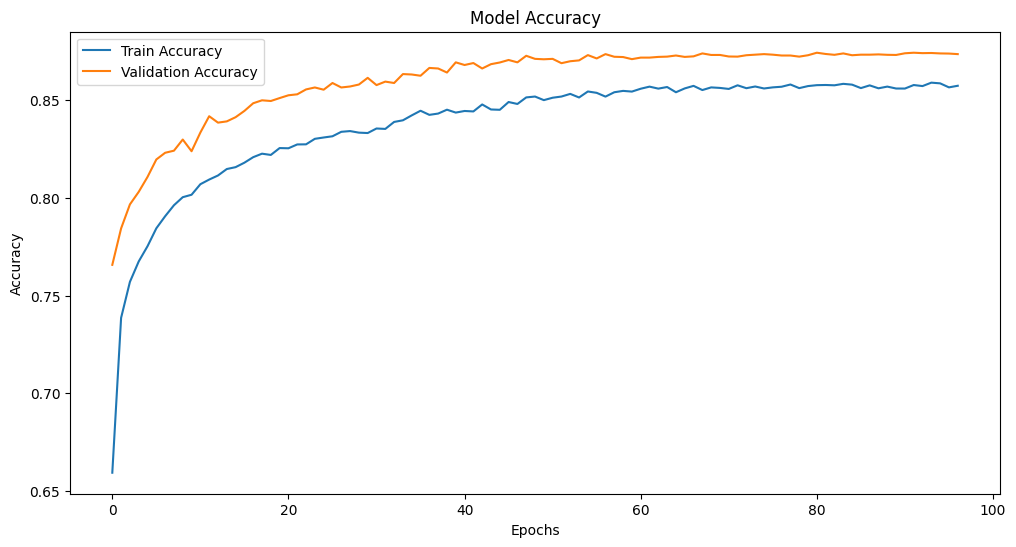

In [197]:
plt.figure(figsize =(12,6))
plt.plot(history2.history["accuracy"] , label = "Train Accuracy")
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

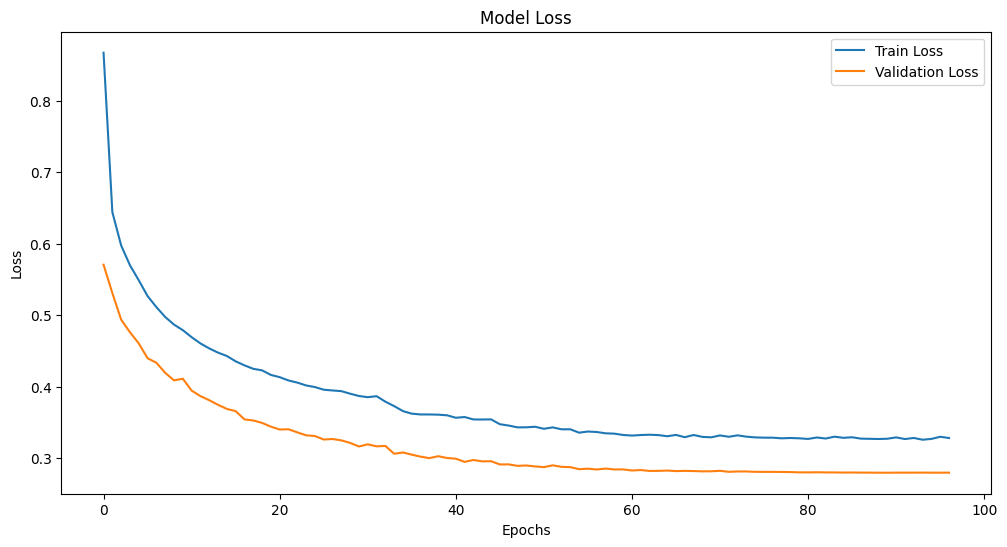

In [199]:
plt.figure(figsize=(12, 6))
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [200]:
from tensorflow.keras.models import load_model

loaded_model = load_model("best_model_2.h5")

Model path C:\Users\saher\Desktop\workshop\Disease_analysis_prediction\Deployment\Logs\best_model_2.h5 does not exist.


In [201]:
loss, accuracy = loaded_model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Make predictions
predictions = loaded_model.predict(x_test)
print(predictions)

Loaded model is not available for evaluation.
